In [1]:
import import_ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
import Demand_Data

importing Jupyter notebook from Demand_Data.ipynb


In [3]:
df_AHC = pd.DataFrame(Demand_Data.df)
df_KMEANS = pd.DataFrame(Demand_Data.df)





In [4]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [5]:
#Using AHC

In [6]:
c = [i for i in range(1 ,365)]
WCSS = []

for i in range(1 , 365) :
    AHC = AgglomerativeClustering(n_clusters = i , affinity= 'euclidean' , linkage= 'ward')
    df_AHC['cluster'] = AHC.fit_predict(df_AHC)
    wcss = 0
    for j in range (1 , i + 1):
        curr = np.array(df_AHC[df_AHC.cluster == j - 1])
        m = np.array(df_AHC[df_AHC.cluster == j - 1].median())
        w = 0;
        
        for k in range(np.size(curr , axis = 0)) :
            x = np.sum((curr[k] - m) ** 2)
            w += x;
        wcss +=  w
    df_AHC.drop('cluster' , axis = 1 , inplace  = True)
    WCSS.append(wcss)

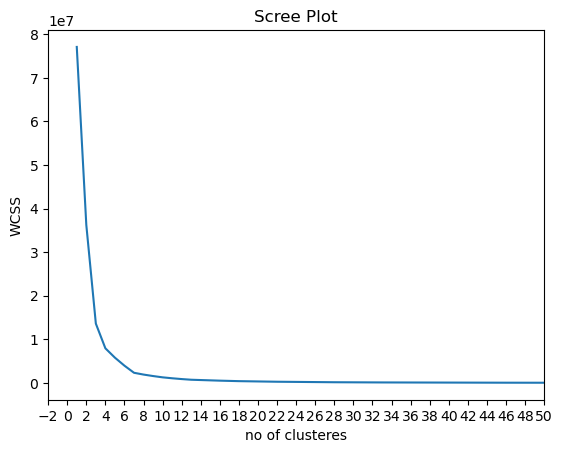

In [7]:
plt.plot(c , WCSS)
plt.xlabel('no of clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)

In [8]:
AHC = AgglomerativeClustering(n_clusters=6, affinity='euclidean' , linkage='ward')
df_AHC['clusters'] = AHC.fit_predict(df_AHC)
res_AHC = df_AHC.groupby('clusters').median()
res_AHC['size'] = df_AHC.groupby('clusters').size()

res_AHC

,Demand(MW),size
clusters,,
0,4891.108099,87
1,4095.804390,68
2,4555.430935,67
3,3485.239401,30
4,3807.919971,48
5,4318.648332,66


In [9]:
#using kmeans
k_range = range(1 , 367)
wcss = []
for k in k_range : 
    km = KMeans(n_clusters = k)
    km.fit(df_KMEANS)
    wcss.append(km.inertia_)
            

C:\Users\Dell\AppData\Local\Temp\ipykernel_8012\3960308530.py:6: ConvergenceWarning: Number of distinct clusters (365) found smaller than n_clusters (366). Possibly due to duplicate points in X.
  km.fit(df_KMEANS)


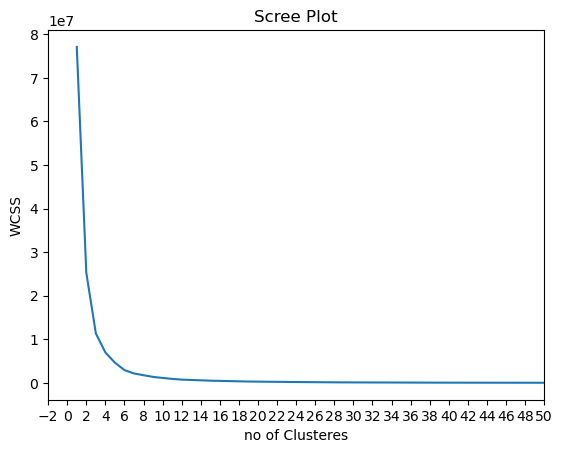

In [10]:
plt.plot(k_range , wcss)
plt.xlabel('no of Clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)

In [11]:
KM = KMeans(n_clusters=6)
df_KMEANS.drop(['cluster'] , axis = 1 ,inplace = True)
df_KMEANS['clusters'] =  KM.fit_predict(df_KMEANS)
res_KMEANS = df_KMEANS.groupby('clusters').median()
res_KMEANS['size'] = df_KMEANS.groupby('clusters').size()
res_KMEANS

,Demand(MW),size
clusters,,
0,4388.669899,89
1,3827.331984,56
2,5038.516149,46
3,3485.239401,30
4,4726.237361,75
5,4129.981305,70


In [12]:
x = pd.read_csv('Central_Delhi.csv' , header = 10)
df_AHC['MO'] = x['MO']
df_AHC['DY'] = x['DY']
df_KMEANS['MO'] = x['MO']
df_KMEANS['DY'] = x['DY']

In [13]:

#loking for the patteren
pd.set_option('display.max_rows', 10)
df_AHC[df_AHC.clusters == 0]


,Demand(MW),clusters,MO,DY
83,4780.504658,0,3,24
87,4745.607251,0,3,28
90,4746.676533,0,3,31
104,4929.189309,0,4,14
119,4737.611847,0,4,29
...,...,...,...,...
285,4790.957846,0,10,12
287,4856.668077,0,10,14
291,5108.539484,0,10,18
294,4987.329302,0,10,21


In [14]:
#Loking for pattern
df_KMEANS[df_KMEANS.clusters == 0]

,Demand(MW),clusters,MO,DY
4,4397.674638,0,1,5
5,4284.484357,0,1,6
11,4443.358594,0,1,12
14,4281.831145,0,1,15
19,4316.670524,0,1,20
...,...,...,...,...
338,4353.885276,0,12,4
342,4284.314656,0,12,8
343,4295.636327,0,12,9
356,4368.829208,0,12,22
